In [18]:
# Import required modules
import pandas as pd
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
import seaborn as sns

The method for this project will be to loop a simple logistic regression model for each column to identify the best predictor of whether a customer will put in a claim or not based on the accuracy of each column's results.

In [19]:
df = pd.read_csv('car_insurance.csv')
print(df.head())

       id  age  gender driving_experience    education         income  \
0  569520    3       0               0-9y  high school    upper class   
1  750365    0       1               0-9y         none        poverty   
2  199901    0       0               0-9y  high school  working class   
3  478866    0       1               0-9y   university  working class   
4  731664    1       1             10-19y         none  working class   

   credit_score  vehicle_ownership vehicle_year  married  children  \
0      0.629027                1.0   after 2015      0.0       1.0   
1      0.357757                0.0  before 2015      0.0       0.0   
2      0.493146                1.0  before 2015      0.0       0.0   
3      0.206013                1.0  before 2015      0.0       1.0   
4      0.388366                1.0  before 2015      0.0       0.0   

   postal_code  annual_mileage vehicle_type  speeding_violations  duis  \
0        10238         12000.0        sedan                    0  

Let's review the datasets quality.

In [20]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

The data appears to already be in good condition with most everything already encoded. However, there are nearly 1,000 missing values in the credit score and annual mileage columns, so we will impute those using the median.

In [21]:
df = df.fillna({'credit_score': df['credit_score'].median(), 'annual_mileage': df['annual_mileage'].median()})

print(df.head())

       id  age  gender driving_experience    education         income  \
0  569520    3       0               0-9y  high school    upper class   
1  750365    0       1               0-9y         none        poverty   
2  199901    0       0               0-9y  high school  working class   
3  478866    0       1               0-9y   university  working class   
4  731664    1       1             10-19y         none  working class   

   credit_score  vehicle_ownership vehicle_year  married  children  \
0      0.629027                1.0   after 2015      0.0       1.0   
1      0.357757                0.0  before 2015      0.0       0.0   
2      0.493146                1.0  before 2015      0.0       0.0   
3      0.206013                1.0  before 2015      0.0       1.0   
4      0.388366                1.0  before 2015      0.0       0.0   

   postal_code  annual_mileage vehicle_type  speeding_violations  duis  \
0        10238         12000.0        sedan                    0  

Next, we'll remove the outcome and id columns. We'll also create an empty list for calculating the accuracies of each column.

In [22]:
columns = [col for col in df.columns if col not in ['id', 'outcome']]

accuracies = []

Now we will create the logistic regression loop that calculates the accuracy of each column and stores it in the list.

In [23]:
for col in columns:
    model = logit(f'outcome ~ {col}', data=df).fit()
    conf_matrix = model.pred_table()
    accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / (conf_matrix[0,1] + conf_matrix[0,0] + conf_matrix[1,1] + conf_matrix[1,0])
    accuracies.append([col, accuracy])

print(accuracies)

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572649
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

Now we need to create a dataframe to make the results more readable, sort by the accuracy, and select the column that has the best accuracy score.

                feature  accuracy
2    driving_experience    0.7771
0                   age    0.7747
4                income    0.7425
6     vehicle_ownership    0.7351
5          credit_score    0.7053
11       annual_mileage    0.6904
1                gender    0.6867
3             education    0.6867
7          vehicle_year    0.6867
8               married    0.6867
9              children    0.6867
10          postal_code    0.6867
12         vehicle_type    0.6867
13  speeding_violations    0.6867
14                 duis    0.6867
15       past_accidents    0.6867


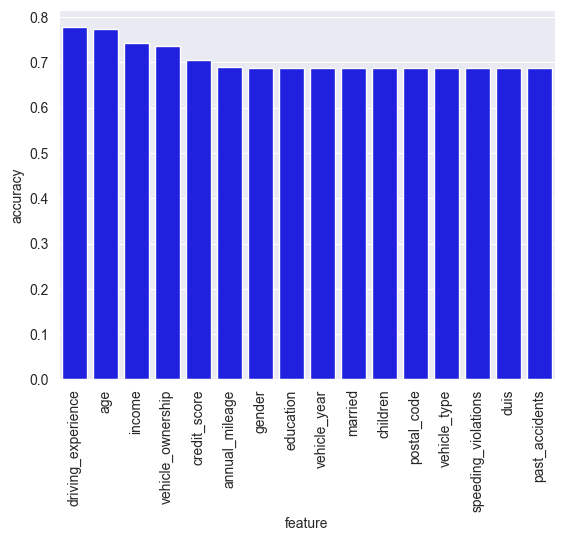

In [24]:
df_accuracies = pd.DataFrame(accuracies, columns=['feature', 'accuracy'])
df_sorted = df_accuracies.sort_values('accuracy', ascending=False)
print(df_sorted)

sns.barplot(data=df_sorted, x='feature', y='accuracy', color='blue')
plt.xticks(rotation=90)
plt.show()

In [25]:
best_feature_df = df_sorted.iloc[[0]]
best_feature_df = best_feature_df.rename(columns={'feature': 'best_feature', 'accuracy': 'best_accuracy'})
print(best_feature_df)

         best_feature  best_accuracy
2  driving_experience         0.7771


## Results
Age and driving experience are essentially tied, however driving experience appears to be the most important feature in predicting whether a car insurance claim will be filed with an accuracy score of 77.71%.